In [1]:
from matplotlib.ticker import FormatStrFormatter as fsf
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, negative_log, load_style_sheet
# from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_style_sheet
import numpy as np
import math as m
import vice
import sys
import os
sys.path.append("..")
from src.utils import mu, get_velocity_profile, boxcarsmoothtrend, oh_to_12pluslog
load_style_sheet("papers")
print(sys.version_info)

/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


In [2]:
def mendezdelgado2022_profile():
    radii = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
#     oh = [np.log10(vice.solar_z.epsilon_to_z_conversion(9.22, 15.999) /
#                    vice.solar_z['o']) - 0.059 * r for r in radii]
    log_oh_plus12 = [9.22 - 0.059 * r for r in radii]
    return [radii, log_oh_plus12]

In [18]:
outputs = [
    # "../outputs/potential_well_deepening/gamma0p1",
    # "../outputs/potential_well_deepening/gamma0p2",
    "../outputs/potential_well_deepening/gamma0p3"
]
outputs = [vice.output(name) for name in outputs]

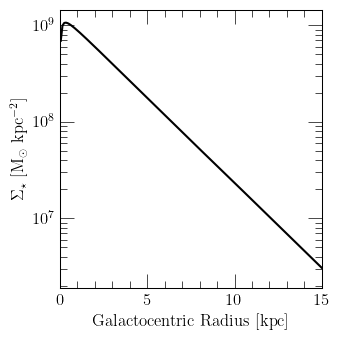

In [19]:
COLORS = ["black", "crimson", "dodgerblue"]

fig = plt.figure(figsize = (3.5, 3.5))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Galactocentric Radius [kpc]")
ax.set_ylabel(r"$\Sigma_\star$ [M$_\odot$ kpc$^{-2}$]")
ax.set_yscale("log")
ax.set_xlim([0, 15])

def plot_surface_density_profile(ax, output, lookback, zone_width = 0.1, **kwargs):
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    radii = [zone_width * (i + 0.5) for i in range(len(output.zones.keys()))]
    sigma_star = []
    for i in range(len(radii)):
        area = np.pi * ((radii[i] + zone_width)**2 - radii[i]**2)
        mstar = output.zones["zone%d" % (i)].history["mstar"][idx]
        sigma_star.append(mstar / area)
    ax.plot(radii, sigma_star, **kwargs)

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]]
    }
    plot_surface_density_profile(ax, outputs[i], 0, **kwargs)

plt.tight_layout()
plt.show()

In [3]:
outputs = [
    "../outputs/constant/vgas-0",
    "../outputs/constant/vgas-0p5",
    "../outputs/constant/vgas-1",
    "../outputs/constant/vgas-1p5"
    # "../outputs/potential-well-deepening/gamma0p1",
    # "../outputs/potential-well-deepening/gamma0p2",
    # "../outputs/potential-well-deepening/gamma0p3"
    # "../outputs/constant/vgas-0p5",
    # "../outputs/potential_well_deepening/gamma0p2",
    # "../outputs/amd/betaphiin0p7",
    # "../outputs/river/insideout"
]
outputs = [vice.output(name) for name in outputs]

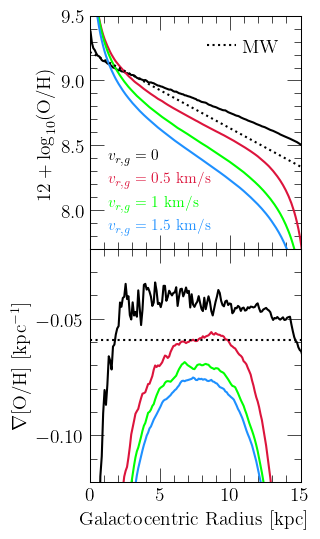

In [17]:
COLORS = ["black", "crimson", "lime", "dodgerblue"]
LINESTYLES = ["-", "-", "-", "-"]
LABELS = [
    r"$v_{r,g} = 0$",
    r"$v_{r,g} = 0.5$ km/s",
    r"$v_{r,g} = 1$ km/s",
    r"$v_{r,g} = 1.5$ km/s"
    # r"$\gamma = 0$",
    # r"$\gamma = 0.1$",
    # r"$\gamma = 0.2$",
    # r"$\gamma = 0.3$"
]

fig = plt.figure(figsize = (3.3, 5.5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex = ax1)
plt.setp(ax1.get_xticklabels(), visible = False)
ax2.set_xlabel(r"Galactocentric Radius [kpc]")
ax2.set_ylabel(r"$\nabla$[O/H] [kpc$^{-1}$]")
ax1.set_ylabel(r"$12 + \log_{10}$(O/H)")
ax1.set_xlim([0, 15])
ax1.set_ylim([7.7, 9.5])
ax2.set_ylim([-0.12, -0.02])
ax2.set_yticks([-0.1, -0.05])

def plot_metallicity_profile(ax_profile, ax_grad, output, lookback, zone_width = 0.1, **kwargs):
    # n_zones = len(output.zones.keys())
    n_zones = 155
    radii = [zone_width * (i + 0.5) for i in range(n_zones)]
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    oh = [output.zones["zone%d" % (i)].history["[o/h]"][idx] for i in range(n_zones)]
    oh = oh_to_12pluslog(oh)
    gradoh = [(outer - inner) / zone_width for outer, inner in zip(oh[1:], oh[:-1])]
    gradoh = boxcarsmoothtrend(radii[:-1], gradoh, window = 5)
    ax_profile.plot(radii, oh, **kwargs)
    ax_grad.plot(radii[:-1], gradoh, **kwargs)

kwargs = {
    "c": named_colors()["black"],
    "linestyle": ":",
    "label": r"MW"
}
line = ax1.plot([1, 2], [1, 2], **kwargs)[0]
kwargs = {
    "loc": mpl_loc("upper right"),
    "bbox_to_anchor": (0.98, 0.98),
    "handlelength": 1.5
}
leg = ax1.legend(**kwargs)
ax1.add_artist(leg)
line.remove()

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "linestyle": LINESTYLES[i],
        "label": LABELS[i]
    }
    plot_metallicity_profile(ax1, ax2, outputs[i], 0, **kwargs)

radii, oh = mendezdelgado2022_profile()
ax1.plot(radii, oh, c = named_colors()["black"], linestyle = ":")
ax2.axhline(-0.059, c = named_colors()["black"], linestyle = ":")

kwargs = {
    "loc": mpl_loc("lower left"),
    "handlelength": 0,
    "fontsize": 11
}
leg = ax1.legend(**kwargs)
fancy_legend(leg, COLORS)

plt.tight_layout()
plt.subplots_adjust(hspace = 0)
plt.show()

In [117]:
outputs = [
    "../outputs/constant/vgas-0p5",
    "../outputs/potential-well-deepening/gamma0p2",
    "../outputs/angular-momentum-dilution/betaphiin0p7",
    "../outputs/river/insideout"
]
outputs = [vice.output(name) for name in outputs]

/Users/jamesjohnson/Work/Research/lib/personal/plots/mpltoolkit/core.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_27623/1199074733.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_27623/1199074733.py:165: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


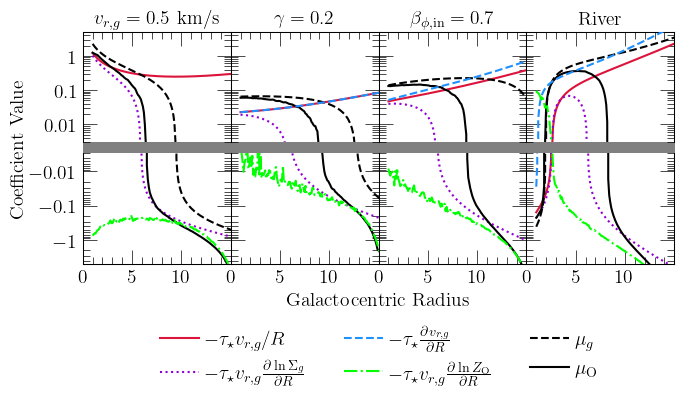

In [131]:
TITLES = [
    r"$v_{r,g} = 0.5$ km/s",
    r"$\gamma = 0.2$",
    r"$\beta_{\phi,\text{in}} = 0.7$",
    r"River"
]

fig = plt.figure(figsize = (7, 4))
pos = len(outputs) * [None]
neg = len(outputs) * [None]
for i in range(len(pos)):
    pos[i] = fig.add_subplot(241 + i)
    plt.setp(pos[i].get_xticklabels(), visible = False)
    neg[i] = fig.add_subplot(245 + i)
    if i:
        plt.setp(pos[i].get_yticklabels(), visible = False)
        plt.setp(neg[i].get_yticklabels(), visible = False)
    else: pass
    kwargs = {
        "axis": "x",
        "which": "both",
        "bottom": False
    }
    pos[i].tick_params(**kwargs)
    kwargs["bottom"] = True
    kwargs["top"] = False
    neg[i].tick_params(**kwargs)
    pos[i].spines["bottom"].set_visible(False)
    neg[i].spines["top"].set_visible(False)
    pos[i].set_yscale("log")
    neg[i].set_yscale("log")
    pos[i].set_xlim([0, 15])
    neg[i].set_xlim([0, 15])
    pos[i].set_ylim([0.003, 5])
    neg[i].set_ylim([0.003, 5])
    # pos[i].set_yticks([0.01, 0.1, 1, 10])
    # neg[i].set_yticks([0.01, 0.1, 1, 10])
    pos[i].set_xticks([0, 5, 10])
    neg[i].set_xticks([0, 5, 10])
    pos[i].set_title(TITLES[i])
    
dummy = fig.add_axes([0.1, 0.1, 0.8, 0.8], xticks = [], yticks = [], zorder = -1000)
dummy.set_xlabel(r"Galactocentric Radius", labelpad = 20)
dummy.set_ylabel(r"Coefficient Value", labelpad = 40)
# xlabelpad = 40
# if WHICH == "mu_o":
#     dummy.set_ylabel(r"$\mu_\text{O}$", labelpad = xlabelpad)
# elif WHICH == "mu_g":
#     dummy.set_xlabel(r"$\mu_g = \dot\Sigma_{\alpha,\text{flow}} / \dot\Sigma_\star$", labelpad = xlabelpad)
# else:
#     raise ValueError("Bad WHICH bruh.")
dummy.set_xlim([0, 1])
dummy.set_ylim([0, 1])
dummy.spines["left"].set_visible(False)
dummy.spines["right"].set_visible(False)
pos[0].yaxis.set_major_formatter(fsf("%g"))
neg[0].yaxis.set_major_formatter(fsf("%g"))


def plot_mu(ax_pos, ax_neg, output, lookback, zone_width = 0.1):
    n_zones = int(15.5 / zone_width)
    radii, vgas = get_velocity_profile(output, lookback)
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    one_over_r_term = []
    density_profile_term = []
    velocity_profile_term = []
    gradz_term = []
    start = 10
    for i in range(start, n_zones):
        zone = output.zones["zone%d" % (i)]
        neighbor = output.zones["zone%d" % (i + 1)]
        if zone.history["sfr"][idx]:
            tau_star = 1.e-9 * zone.history["mgas"][idx] / zone.history["sfr"][idx]
        else:
            tau_star = float("inf")
        tv = tau_star * vgas[i]
        one_over_r_term.append(-tv / radii[i] if radii[i] else float("inf"))
        area = np.pi * ((radii[i] + zone_width)**2 - radii[i]**2)
        n_area = np.pi * ((radii[i] + 2 * zone_width)**2 - (radii[i] + zone_width)**2)
        sigma_g = zone.history["mgas"][idx]
        n_sigma_g = neighbor.history["mgas"][idx]
        dlnsigmag_dr = (n_sigma_g - sigma_g) / (sigma_g * zone_width)
        density_profile_term.append(-tv * dlnsigmag_dr)
        dlnv_dr = (vgas[i + 1] - vgas[i]) / (vgas[i] * zone_width)
        velocity_profile_term.append(-tv * dlnv_dr)
        dlnz_dr = (neighbor.history["z(o)"][idx] - zone.history["z(o)"][idx]) / (zone.history["z(o)"][idx] * zone_width)
        gradz_term.append(-tv * dlnz_dr)
    radii = radii[start:n_zones]
    
    kwargs = { # one over r
        "c": named_colors()["crimson"],
        "label": r"$-\tau_\star v_{r,g} / R$",
        "linestyle": "-"
    }
    # one_over_r_term = boxcarsmoothtrend(radii, one_over_r_term, window = 5)
    ax_pos.plot(radii, one_over_r_term, **kwargs)
    ax_neg.plot(radii, [-o for o in one_over_r_term], **kwargs)
    
    kwargs = { # surface density profile
        "c": named_colors()["darkviolet"],
        "label": r"$-\tau_\star v_{r,g} \frac{\partial \ln \Sigma_g}{\partial R}$",
        "linestyle": ":",
    }
    # density_profile_term = boxcarsmoothtrend(radii, density_profile_term, window = 5)
    ax_pos.plot(radii, density_profile_term, **kwargs)
    ax_neg.plot(radii, [-d for d in density_profile_term], **kwargs)
    
    kwargs = { # velocity profile
        "c": named_colors()["dodgerblue"],
        "label": r"$-\tau_\star \frac{\partial v_{r,g}}{\partial R}$",
        "linestyle": "--",
        "zorder": 1000
    }
    # velocity_profile_term = boxcarsmoothtrend(radii, velocity_profile_term, window = 10)
    ax_pos.plot(radii, velocity_profile_term, **kwargs)
    ax_neg.plot(radii, [-v for v in velocity_profile_term], **kwargs)

    kwargs = { # metallicity gradient
        "c": named_colors()["lime"],
        "label": r"$-\tau_\star v_{r,g} \frac{\partial \ln Z_\text{O}}{\partial R}$",
        "linestyle": "-.",
        "zorder": 1000
    }
    # gradz_term = boxcarsmoothtrend(radii, gradz_term, window = 5)
    ax_pos.plot(radii, gradz_term, **kwargs)
    ax_neg.plot(radii, [-g for g in gradz_term], **kwargs)

    total = [a + b + c for a, b, c in zip(one_over_r_term, density_profile_term, velocity_profile_term)]
    kwargs = { # mu_gas
        "c": named_colors()["black"],
        "label": r"$\mu_g$",
        "linestyle": "--"
    }
    # total = boxcarsmoothtrend(radii, total, window = 5)
    ax_pos.plot(radii, total, **kwargs)
    ax_neg.plot(radii, [-t for t in total], **kwargs)

    total = [a + b for a, b in zip(total, gradz_term)]
    kwargs = { # mu_o
        "c": named_colors()["black"],
        "label": r"$\mu_\text{O}$",
        "linestyle": "-"
    }
    total = boxcarsmoothtrend(radii, total, window = 5)
    ax_pos.plot(radii, total, **kwargs)
    ax_neg.plot(radii, [-t for t in total], **kwargs)

for i in range(len(outputs)):
    plot_mu(pos[i], neg[i], outputs[i], 0)

kwargs = {
    "loc": mpl_loc("upper center"),
    "bbox_to_anchor": (1, -0.4),
    # "ncol": {"mu_o": 5, "mu_g": 4}[WHICH],
    "ncol": 3,
    "handlelength": 2
}
neg[1].legend(**kwargs)

h = 0.1
dummy.fill_between(dummy.get_xlim(), 2 * [0.5 + h / 2], 2 * [0.5 - h / 2], color = named_colors()["grey"])
for i in range(len(outputs)):
    negative_log(neg[i])
plt.tight_layout()
# plt.subplots_adjust(hspace = h, wspace = 0, bottom = 0.15, top = 0.7, right = 0.97)
plt.subplots_adjust(hspace = h, wspace = 0, bottom = 0.32, top = 0.9, right = 0.97)
dummy.set_position([
    neg[0].get_position().x0,
    neg[0].get_position().y0,
    neg[-1].get_position().x1 - neg[0].get_position().x0,
    pos[0].get_position().y1 - neg[0].get_position().y0
])
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./profiles/mu-fiducial-models.%s" % (ext), **kwargs)
plt.show()

In [2]:
outputs = [
    "../outputs/river/insideout",
    "../outputs/potential-well-deepening/gamma0p2",
    "../outputs/angular-momentum-dilution/betaphiin0p7",
    "../outputs/constant/vgas-0p5"
]
outputs = [vice.output(name) for name in outputs]

/Users/jamesjohnson/Work/Research/lib/personal/plots/mpltoolkit/core.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


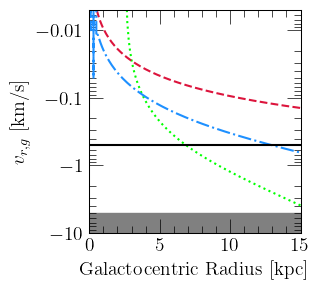

In [9]:
COLORS = ["lime", "crimson", "dodgerblue", "black"]
LINESTYLES = [":", "--", "-.", "-"]
LABELS = [
    r"River",
    r"$\gamma = 0.2$",
    r"$\beta_{\phi,\text{in}} = 0.7$",
    r"$v_{r,g} = -0.5$ km/s"
]

fig = plt.figure(figsize = (3.3, 3))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Galactocentric Radius [kpc]")
ax.set_ylabel(r"$v_{r,g}$ [km/s]")
ax.set_xlim([0, 15])
ax.set_ylim([0.005, 10])
ax.set_yscale("log")
ax.yaxis.set_major_formatter(fsf("%g"))

def plot_velocity_profile(output, lookback, zone_width = 0.1, **kwargs):
    assert os.path.exists("%s_gasvelocities.out" % (output.name)), "bruh"
    radii, vgas = get_velocity_profile(output, lookback)
    # print(radii, vgas)
    vgas = [-v for v in vgas]
    ax.plot(radii, vgas, **kwargs)

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "linestyle": LINESTYLES[i],
        "label": LABELS[i]
    }
    plot_velocity_profile(outputs[i], 0, **kwargs)

ax.fill_between(ax.get_xlim(), 2 * [5], 2 * [ax.get_ylim()[1]], color = named_colors()["grey"])

# kwargs = {
#     "loc": mpl_loc("lower left"),
#     # "bbox_to_anchor": (0.5, 1.05),
#     "fontsize": 11,
#     # "ncol": 2
# }
# ax.legend(**kwargs)

negative_log(ax)
plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./profiles/velocity-comp.%s" % (ext), **kwargs)
plt.show()